In [1]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [3]:
data = pd.read_csv('Alzheimers dataset.csv')

# Displaying the first few rows of the dataset to get an overview
data.head()

,Birth Year,Sex,Years of Education,Cognitive Decline due to Cardiovascular Issues,Cognitive Decline due to Stroke,Memory Score,Decision-Making Cognitive Decline,Cognitive Memory Assessment,Cognitive Orientation Assessment,Cognitive Judgment Assessment,...,Alcohol Occasional Use,Alcohol Frequency,Alcohol Consumption,Alcohol Dementia,Alcohol-Induced Dementia,Alcohol Abuse,Family History of Cognitive Decline,Other Biomarkers,Other Biomarker Details,Neuropsychological Genetics
0,1939,2,16,-4,-4,0.5,1,1,0,1,...,-4,-4,-4,0,7,8,0,0,NaN,-4.0
1,1944,1,18,-4,-4,0.5,1,1,0,1,...,1,2,0,0,7,8,0,0,NaN,-4.0
2,1956,2,10,1,0,2.0,-4,1,-4,1,...,-4,-4,0,0,7,-4,1,-4,NaN,-4.0
3,1924,2,14,-4,-4,2.0,1,1,1,1,...,-4,-4,-4,0,7,8,0,0,NaN,-4.0
4,1950,1,16,8,8,0.0,-4,0,-4,0,...,-4,-4,0,8,8,-4,0,-4,NaN,-4.0


In [4]:
# Checking the shape of the dataset
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (19209, 58)


In [5]:
#coloumns of the dataset
data.columns

Index(['Birth Year', 'Sex', 'Years of Education',
       'Cognitive Decline due to Cardiovascular Issues',
       'Cognitive Decline due to Stroke', 'Memory Score',
       'Decision-Making Cognitive Decline', 'Cognitive Memory Assessment',
       'Cognitive Orientation Assessment', 'Cognitive Judgment Assessment',
       'Cognitive Language Assessment', 'Cognitive Visual Assessment',
       'Cognitive Attention Assessment', 'Cognitive Fluctuations',
       'Cognitive Flag Ongoing', 'Other Cognitive Symptoms',
       'Other Cognitive Symptoms Explanation', 'NACC Cognitive Function',
       'Cognitive Mode', 'Cognitive Mode Explanation', 'MMSE Completion',
       'MMSE Location', 'MMSE Language', 'MMSE Language Explanation',
       'MMSE Vision', 'MMSE Hearing', 'MMSE Orientation Date',
       'MMSE Orientation Location', 'NACC MMSE Score', 'Cognitive Status',
       'Normal Cognitive Function', 'Other Cognitive Function',
       'Other Cognitive Function Identified',
       'Other Cogni

In [6]:
#information about the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19209 entries, 0 to 19208
Data columns (total 58 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Birth Year                                      19209 non-null  int64  
 1   Sex                                             19209 non-null  int64  
 2   Years of Education                              19209 non-null  int64  
 3   Cognitive Decline due to Cardiovascular Issues  19209 non-null  int64  
 4   Cognitive Decline due to Stroke                 19209 non-null  int64  
 5   Memory Score                                    19209 non-null  float64
 6   Decision-Making Cognitive Decline               19209 non-null  int64  
 7   Cognitive Memory Assessment                     19209 non-null  int64  
 8   Cognitive Orientation Assessment                19209 non-null  int64  
 9   Cognitive Judgment Assessment          

In [7]:
# Columns to keep for Alzheimer's disease prediction
columns_to_keep = [
    'Birth Year',               # Proxy for age
    'Sex',                      # Gender could influence cognitive decline
    'Years of Education',       # Education might impact cognitive health
    'Cognitive Decline due to Cardiovascular Issues',
    'Cognitive Decline due to Stroke',
    'Memory Score',             # Core cognitive indicator
    'Decision-Making Cognitive Decline',
    'Cognitive Memory Assessment',
    'Cognitive Orientation Assessment',
    'Cognitive Judgment Assessment',
    'Family History of Cognitive Decline', # Genetic predisposition
    'Other Biomarkers',         # Biological markers can provide insights
    'Neuropsychological Genetics'
]

# Removing unnecessary columns
df = data[columns_to_keep]

# Display the cleaned dataset with only relevant columns
df.head()



,Birth Year,Sex,Years of Education,Cognitive Decline due to Cardiovascular Issues,Cognitive Decline due to Stroke,Memory Score,Decision-Making Cognitive Decline,Cognitive Memory Assessment,Cognitive Orientation Assessment,Cognitive Judgment Assessment,Family History of Cognitive Decline,Other Biomarkers,Neuropsychological Genetics
0,1939,2,16,-4,-4,0.5,1,1,0,1,0,0,-4.0
1,1944,1,18,-4,-4,0.5,1,1,0,1,0,0,-4.0
2,1956,2,10,1,0,2.0,-4,1,-4,1,1,-4,-4.0
3,1924,2,14,-4,-4,2.0,1,1,1,1,0,0,-4.0
4,1950,1,16,8,8,0.0,-4,0,-4,0,0,-4,-4.0


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing Values: \n{missing_values}")

Missing Values: 
Birth Year                                           0
Sex                                                  0
Years of Education                                   0
Cognitive Decline due to Cardiovascular Issues       0
Cognitive Decline due to Stroke                      0
Memory Score                                         0
Decision-Making Cognitive Decline                    0
Cognitive Memory Assessment                          0
Cognitive Orientation Assessment                     0
Cognitive Judgment Assessment                        0
Family History of Cognitive Decline                  0
Other Biomarkers                                     0
Neuropsychological Genetics                       2712
dtype: int64


In [9]:
# Impute missing values in 'Neuropsychological Genetics' with the median
df['Neuropsychological Genetics'] = df['Neuropsychological Genetics'].fillna(
    df['Neuropsychological Genetics'].median())

# Check if the missing values have been imputed
missing_values_after_imputation = df.isnull().sum()
print(missing_values_after_imputation)


Birth Year                                        0
Sex                                               0
Years of Education                                0
Cognitive Decline due to Cardiovascular Issues    0
Cognitive Decline due to Stroke                   0
Memory Score                                      0
Decision-Making Cognitive Decline                 0
Cognitive Memory Assessment                       0
Cognitive Orientation Assessment                  0
Cognitive Judgment Assessment                     0
Family History of Cognitive Decline               0
Other Biomarkers                                  0
Neuropsychological Genetics                       0
dtype: int64


/var/folders/ww/3_fjkv0x29ggs63lp0s_hx2c0000gn/T/ipykernel_24679/3314800443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neuropsychological Genetics'] = df['Neuropsychological Genetics'].fillna(


In [17]:
# Check for duplicate rows in the dataset
print("Number of duplicate rows in the dataset before removal:")
duplicates_before = df.duplicated().sum()
print(duplicates_before)

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Check for duplicates again to confirm removal
print("\nNumber of duplicate rows in the dataset after removal:")
duplicates_after = df_cleaned.duplicated().sum()
print(duplicates_after)


Number of duplicate rows in the dataset before removal:
5973

Number of duplicate rows in the dataset after removal:
0


In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13236 entries, 0 to 19206
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Birth Year                                      13236 non-null  int64  
 1   Sex                                             13236 non-null  int64  
 2   Years of Education                              13236 non-null  int64  
 3   Cognitive Decline due to Cardiovascular Issues  13236 non-null  int64  
 4   Cognitive Decline due to Stroke                 13236 non-null  int64  
 5   Memory Score                                    13236 non-null  float64
 6   Decision-Making Cognitive Decline               13236 non-null  int64  
 7   Cognitive Memory Assessment                     13236 non-null  int64  
 8   Cognitive Orientation Assessment                13236 non-null  int64  
 9   Cognitive Judgment Assessment               

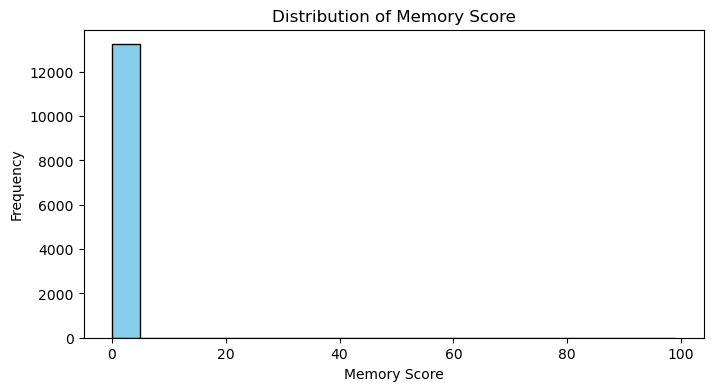

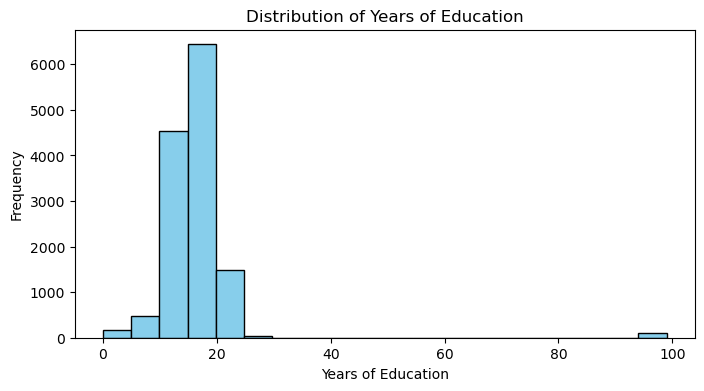

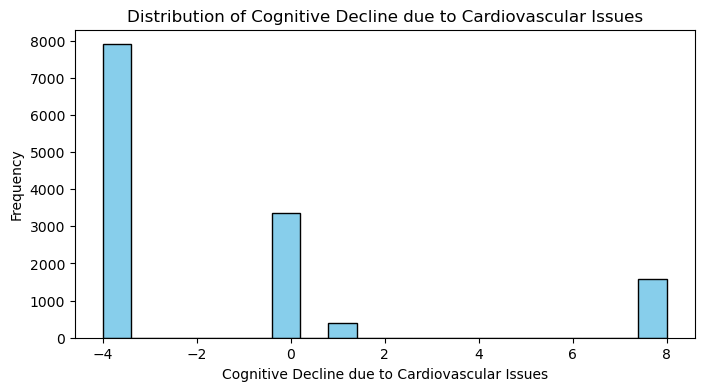

In [22]:
import matplotlib.pyplot as plt

# Plot distributions for key features
features_to_plot = ['Memory Score', 'Years of Education', 'Cognitive Decline due to Cardiovascular Issues']

for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    plt.hist(df_cleaned[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


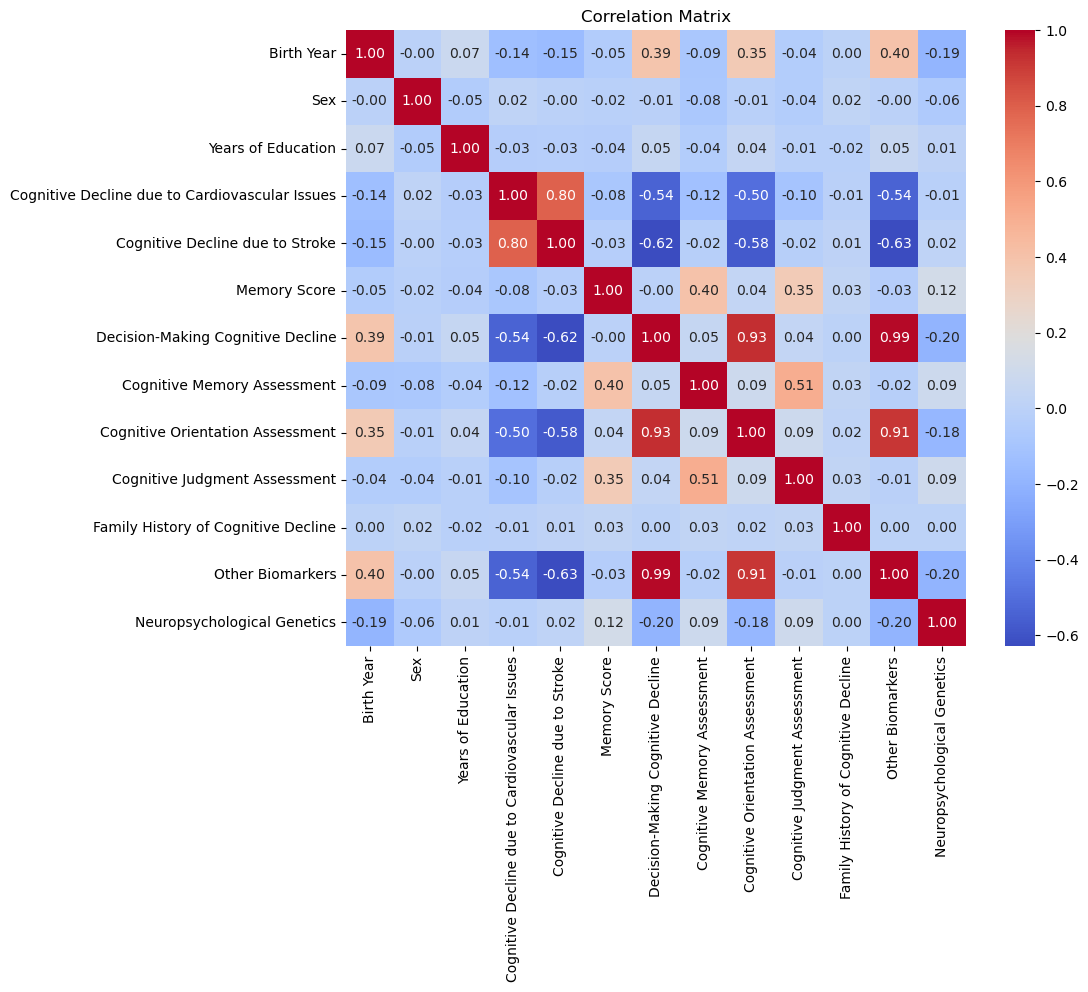

In [24]:
import seaborn as sns

# Correlation matrix to check relationships between features
plt.figure(figsize=(10, 8))
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

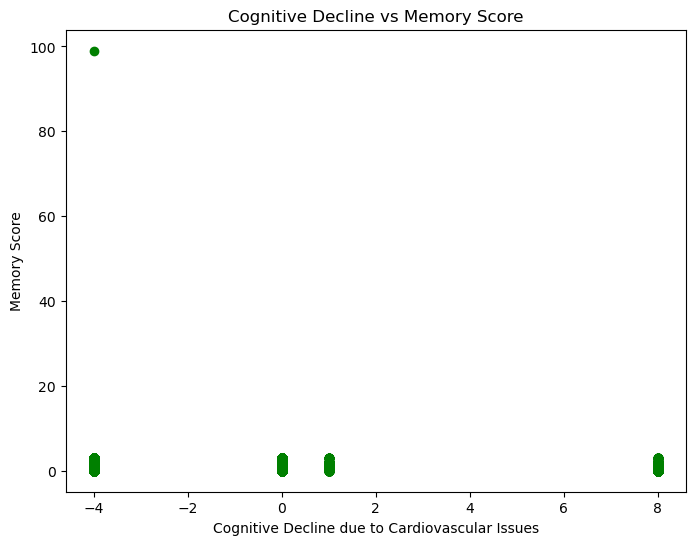

In [27]:
# Scatter plot to check relationship between cognitive decline and memory score
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['Cognitive Decline due to Cardiovascular Issues'], df_cleaned['Memory Score'], color='green')
plt.title('Cognitive Decline vs Memory Score')
plt.xlabel('Cognitive Decline due to Cardiovascular Issues')
plt.ylabel('Memory Score')
plt.show()

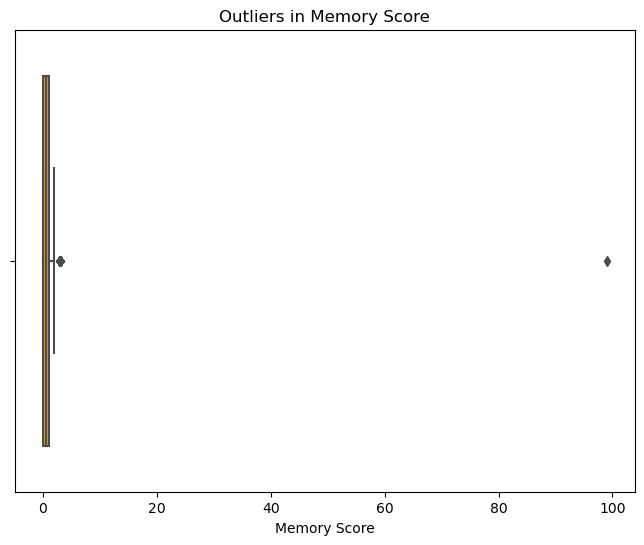

In [29]:
# Boxplot to detect outliers in memory score
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Memory Score'], color='orange')
plt.title('Outliers in Memory Score')
plt.show()

In [33]:
# Removing outliers using the IQR method for Memory Score
Q1 = df_cleaned['Memory Score'].quantile(0.25)
Q3 = df_cleaned['Memory Score'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers in the Memory Score
alzheimers_data_no_outliers = df_cleaned[
    (df_cleaned['Memory Score'] >= lower_bound) & 
    (df_cleaned['Memory Score'] <= upper_bound)
]

print(f"Original dataset size: {df_cleaned.shape[0]}")
print(f"Dataset size after outlier removal: {alzheimers_data_no_outliers.shape[0]}")


Original dataset size: 13236
Dataset size after outlier removal: 12428


In [34]:
from sklearn.impute import SimpleImputer

# Define the features and target variable after removing outliers
X = alzheimers_data_no_outliers.drop(columns=['Memory Score'])
y = alzheimers_data_no_outliers['Memory Score']

# Use the median to fill missing values
imputer = SimpleImputer(strategy='median')

# Apply the imputer to the feature set
X_imputed = imputer.fit_transform(X)


In [35]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


# Linear Regression Model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Output the evaluation results
print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Linear Regression R² Score: {r2_lr}")


Linear Regression Mean Squared Error: 0.21813081372687795
Linear Regression R² Score: 0.4354711084415349


# Gradient Boosting Model

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting R² Score: {r2_gb}")

Gradient Boosting Mean Squared Error: 0.15088631922912912
Gradient Boosting R² Score: 0.6095018164081547


# Random Forest Model

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R² Score: {r2_rf}")


Random Forest Mean Squared Error: 0.20138137021624128
Random Forest R² Score: 0.47881915550434084
